In [88]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px

In [2]:
data = pd.read_csv("../data/job_descriptions.csv")
# Convert it into datetime object
data['Job Posting Date'] = pd.to_datetime(data['Job Posting Date'], format = "%Y-%M-%d")

## Ideas to implement
- We can implement a *slider* for
    - *Salary Range*
    - *Company Size*
- Use *select box* to determine  
    - type of role *Work Type*
    - location *Country*
- Plot the role distribution according to the following information

### Information Required
- Country
- Salary Range
- Work Type
- Company Size
- Job Title
- Company name
- Job Posting Date


In [3]:

desired_columns = ['Salary Range', 'Country', 'Work Type', 
                  'Company Size', 'Job Posting Date', 'Job Title', 
                  'Company']
filtered_df = data[desired_columns]
filtered_df = filtered_df[(filtered_df['Job Posting Date'].dt.year == 2023)]


In [4]:
def get_max(s: str):
    elements = s.split('-')
    return int(elements[1][1:-1])

def get_min(s: str):
    elements = s.split('-')
    return int(elements[0][1:-1])

In [5]:
filtered_df['Max Salary'] = filtered_df['Salary Range'].apply(get_max)
filtered_df['Min Salary'] = filtered_df['Salary Range'].apply(get_min)
filtered_df.drop("Salary Range", inplace=True, axis = 1)
filtered_df.drop("Job Posting Date", inplace=True, axis=1)
filtered_df = filtered_df.head(16000)

In [13]:
filtered_df['Company'].unique()

array(['Hess', 'Adani Ports and Special Economic Zone', 'FedEx',
       "McDonald's", 'Bayer AG', 'EasyJet', 'Otis Worldwide',
       'HCL Technologies', 'Xcel Energy', 'Deutsche Post DHL Group',
       'Bodycote', 'Old Republic International',
       'United Airlines Holdings', 'Regions Financial',
       'Wyndham Hotels & Resorts, Inc.', "Divi's Laboratories",
       'Tata Consumer Products', 'Fannie Mae', 'News Corp.', 'Arconic',
       'Philip Morris International', 'Enterprise Products Partners',
       'Carrier Global', 'UnitedHealth Group', 'UGI', 'Disney+',
       'Brighthouse Financial', 'Deutsche Pfandbriefbank AG',
       'Hindalco Industries', 'Lincoln National', 'Stockland Corporation',
       'Altria Group', 'Continental AG', 'Tesla', 'WESCO International',
       'Unilever', 'Revlon, Inc.', 'Constellation Brands', 'ODP',
       'Farmers Insurance Exchange', 'Croda International', 'Textron',
       'American Electric Power', 'Peter Kiewit Sons', 'General Mills',
       'P

In [89]:
new_df = filtered_df.groupby(['Company', 'Job Title']).count().unstack(0).fillna(0)
new_df.columns = new_df.columns.droplevel(0)
new_df = new_df.loc[:, ~new_df.columns.duplicated()]
new_df = new_df.reset_index()

In [90]:
new_df

Company,Job Title,3M,3i Group,A-Mark Precious Metals,ABM Industries,AECOM,AES,AGCO,AMP Limited,APA,...,Workspace Group,World Fuel Services,"Wyndham Hotels & Resorts, Inc.",XPO,Xcel Energy,Xiaomi Corporation,Yum China Holdings,ZTE Corporation,Zee Entertainment Enterprises,Zoetis
0,Account Director,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Account Executive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Account Manager,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Accountant,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Administrative Assistant,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Urban Planner,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143,Veterinarian,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,Web Designer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
145,Web Developer,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
new_df[new_df['3M'] != 0]

Company,Job Title,3M,3i Group,A-Mark Precious Metals,ABM Industries,AECOM,AES,AGCO,AMP Limited,APA,...,Workspace Group,World Fuel Services,"Wyndham Hotels & Resorts, Inc.",XPO,Xcel Energy,Xiaomi Corporation,Yum China Holdings,ZTE Corporation,Zee Entertainment Enterprises,Zoetis
3,Accountant,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,Customer Support Specialist,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30,Dental Hygienist,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36,Environmental Engineer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,HR Coordinator,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
59,Inventory Analyst,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
61,Investment Analyst,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Legal Advisor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Legal Assistant,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
74,Marketing Analyst,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


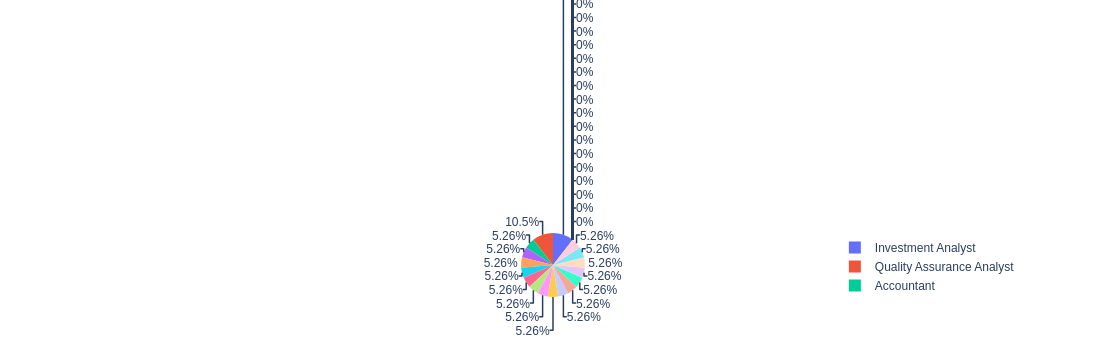

In [98]:
px.pie(new_df, names='Job Title', values='3M')

In [193]:
filtered_df.to_csv('../data/job_csv.csv')

In [171]:
filtered_df['Max Salary'].min()

np.int64(80)

In [180]:
len(filtered_df['Country'].unique())

216

In [197]:
df = filtered_df[(filtered_df['Country']=='USA') & (filtered_df['Work Type']=="Full-Time")]

In [201]:
(df['Max Salary'] < 80000) & (df['Min Salary'] > 55000)

6242     False
7560     False
13345    False
15550    False
17547    False
17920    False
18580    False
22932    False
35223    False
35667    False
38914    False
41089    False
41404    False
41513    False
41770    False
dtype: bool

In [211]:
(df['Min Salary']>50) & (df['Max Salary']<110)

6242     False
7560      True
13345    False
15550     True
17547     True
17920    False
18580     True
22932     True
35223    False
35667     True
38914    False
41089     True
41404     True
41513     True
41770    False
dtype: bool